# Assignment1

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
random.seed(579)
np.random.seed(579)

1. Write a small simulator for a Bernoulli bandit with k arms. The probability of success pi for each arm i ∈ {1, ...k} should be provided as an input. The bandit should have a function called ”sample” which takes as input the index of an action and provides a reward sample. Recall that a Bernoulli bandit outputs either 1 or 0, drawn from a binomial distribution of parameter pk.

In [258]:
class Bandit:
    def __init__(self, probabilities):
        self.actions = probabilities

    def sample(self, action_index):
        p = self.actions[action_index]
        return np.random.binomial(size=1, n=1, p=p)

2. Test your code with 3 arms of parameters q∗ = [0.7, 0.7 − δ, 0.7 − 2δ], with δ = 0.2. Generate and save a set of 100 samples for each action. For the test, plot one graph for each action, containing the reward values obtained over the 100 draws, the empirical mean of the values, and the true q∗ for each arm. Each graph will have an x-axis that goes to 100, two horizontal lines (true value and estimated value) and a set of points of value 0 and 1.

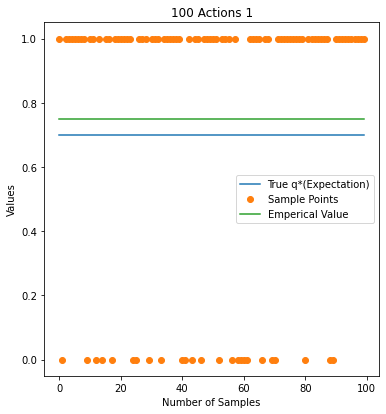

In [259]:
bandit = Bandit([0.7, 0.7 - 0.2, 0.7 - 2 * 0.2])
action1_qStar = [0.7] * 100
action1_sample = []
action1_Qt = []
for i in range(100):
    r = action1_sample.append(bandit.sample(0))
    if i == 0:
        action1_Qt.append(r)
        continue
    action1_Qt.append(sum(action1_sample[:i]) / i)
x = np.arange(100)
count = action1_sample.count(1)
plt.figure(figsize=(6, 6.5))
plt.plot(x, action1_qStar, label='True q*(Expectation)')
plt.plot(x, action1_sample, 'o', label="Sample Points")
plt.plot(x, [count/100] * 100, label="Emperical Value")
plt.xlabel('Number of Samples')
plt.ylabel('Values')
plt.title("100 Actions 1")
plt.legend()
plt.show()

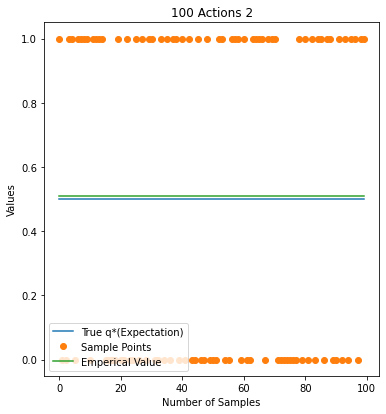

In [260]:
action2_qStar = [0.7 - 0.2] * 100
action2_sample = []
action2_Qt = [0]
for i in range(100):
    r = action2_sample.append(bandit.sample(1))
    if i == 0:
        action2_Qt.append(r)
        continue
    action2_Qt.append(sum(action2_sample[:i]) / i)
x = np.arange(100)
count = action2_sample.count(1)
plt.figure(figsize=(6, 6.5))
plt.plot(x, action2_qStar, label='True q*(Expectation)')
plt.plot(x, action2_sample, 'o', label="Sample Points")
plt.plot(x, [count/100] * 100, label="Emperical Value")
plt.xlabel('Number of Samples')
plt.ylabel('Values')
plt.title("100 Actions 2")
plt.legend()
plt.show()

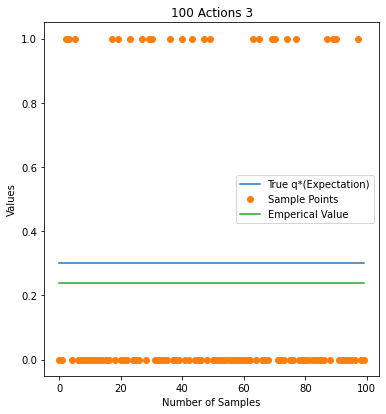

In [261]:
action3_qStar = [0.7 - 0.2 * 2] * 100
action3_sample = []
action3_Qt = [0]
for i in range(100):
    r = action3_sample.append(bandit.sample(2))
    if i == 0:
        action3_Qt.append(r)
        continue
    action3_Qt.append(sum(action3_sample[:i]) / i)
x = np.arange(100)
count = action3_sample.count(1)
plt.figure(figsize=(6, 6.5))
plt.plot(x, action3_qStar, label='True q*(Expectation)')
plt.plot(x, action3_sample, 'o', label="Sample Points")
plt.plot(x, [count/100] * 100, label="Emperical Value")
plt.xlabel('Number of Samples')
plt.ylabel('Values')
plt.title("100 Actions 3")
plt.legend()
plt.show()

3. Code the rule for estimating action values discussed in lecture 2, with a fixed learning rate α, in a function called ”update”, and using the incremental computation of the mean presented in lecture 2, in a function called updateAvg Using the previous data, plot for each action a graph showing the estimated q value as a function of the number of samples, using averaging as well as α = 0.01 and α = 0.1, and the true value. Each graph should have two curves and a horizontal line.

In [262]:
def update(alpha, old, target):
    return old + alpha * (target - old)
def updateAvg(targets, action_index):
    Qt_1 = [0]
    Qt_2 = [0]
    avg = [0]
    for i in range(1, 100):
        Qt_1.append(update(0.1, Qt_1[i - 1], targets[i - 1]))
        Qt_2.append(update(0.01, Qt_2[i - 1], targets[i - 1]))
        avg.append(update(1/i, avg[i - 1], targets[i - 1]))
    x = np.arange(100)
    plt.figure(figsize=(6, 6.5))
    plt.plot(x, [bandit.actions[action_index]] * 100, label='True q*(Expectation)')
    plt.plot(x, Qt_1, label="alpha=0.1")
    plt.plot(x, Qt_2, label="alpha=0.01")
    plt.plot(x, avg, label="Averaging")
    plt.xlabel('Number of Samples')
    plt.ylabel('Values')
    plt.title("Averaging 100 Actions " + str(action_index + 1))
    plt.legend()
    plt.show()

/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (whi

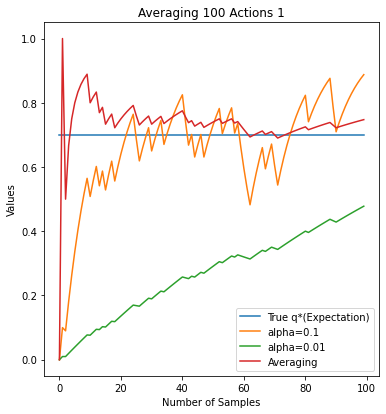

In [263]:
updateAvg(action1_sample, 0)

/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (whi

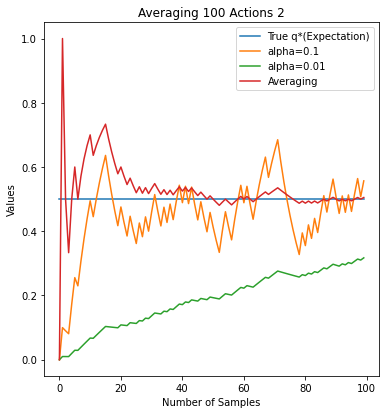

In [264]:
updateAvg(action2_sample, 1)

/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/stevenyuan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (whi

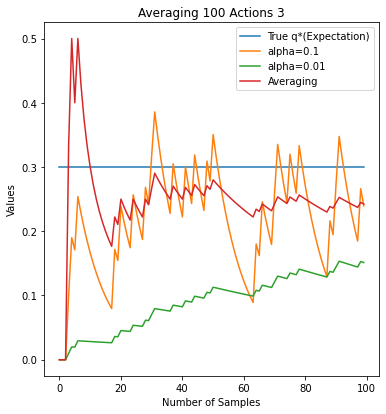

In [265]:
updateAvg(action3_sample, 2)

4. Repeat the above experiment 5 times, starting with action value estimates of 0. Each run will still contain 100 samples for each action. Plot the same graph as above, but where the curves have the average and standard error over the 5 runs. Explain in 1-2 sentences what you observe. Which of the α values is better? How do they compare to averaging? If you wanted to optimize further, in what range of α would you look for better values?

In [266]:
def repeat_experiment(action_index):
    samples = [[] for i in range(500)]
    Qt_1 = [[0] for i in range(500)]
    Qt_2 = [[0] for i in range(500)]
    avg = [[0] for i in range(500)]
    for i in range(500):
        for j in range(100): 
            samples[i].append(bandit.sample(action_index))
        for j in range(1, 100):
            Qt_1[i].append(update(0.1, Qt_1[i][j - 1], samples[i][j - 1]))
            Qt_2[i].append(update(0.01, Qt_2[i][j - 1], samples[i][j - 1]))
            avg[i].append(update(1/j, avg[i][j - 1], samples[i][j - 1]))
    mean_Qt_1 = [np.mean([Qt_1[i][j] for i in range(500)]) for j in range(100)]
    mean_Qt_2 = [np.mean([Qt_2[i][j] for i in range(500)]) for j in range(100)]
    mean_avg = [np.mean([avg[i][j] for i in range(500)]) for j in range(100)]
    err_Qt_1 = [np.std([Qt_1[i][j] for i in range(500)]) for j in range(100)]
    err_Qt_2 = [np.std([Qt_2[i][j] for i in range(500)]) for j in range(100)]
    err_avg = [np.std([avg[i][j] for i in range(500)]) for j in range(100)]
    x = np.arange(100)
    plt.figure(figsize=(6, 6.5))
    plt.plot(x, [bandit.actions[action_index]] * 100, label='True q*(Expectation)')
    plt.errorbar(x, mean_Qt_1, yerr=err_Qt_1, label="alpha=0.1")
    plt.errorbar(x, mean_Qt_2, yerr=err_Qt_2, label="alpha=0.01")
    plt.errorbar(x, mean_avg, yerr=err_avg, label="Averaging")
    plt.xlabel('Number of Samples')
    plt.ylabel('Values')
    plt.title("Mean and Std of Averaging of 100 Actions " + str(action_index + 1))
    plt.legend()
    plt.show()

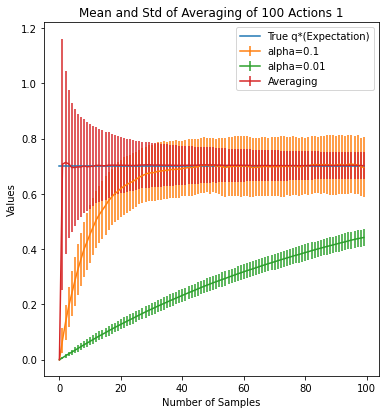

In [267]:
repeat_experiment(0)

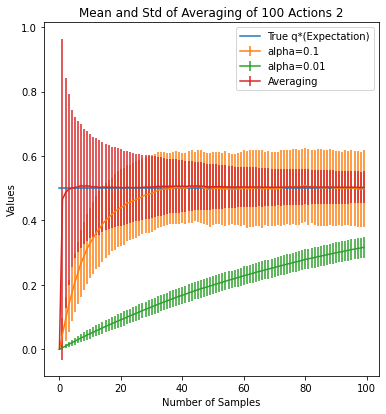

In [268]:
repeat_experiment(1)

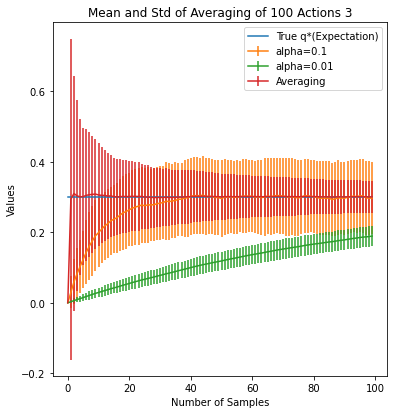

In [269]:
repeat_experiment(2)

5. Code the ε-greedy algorithm discussed in class,with averaging updates, with ε provided as an input. We will run 5 independent runs. In each run, we will have 1000 time steps. We are interested in the following graphs: 
(a) The reward received over time, averaged at each time step over the 5 independent runs (with no smoothing over the time steps), and the standard error over the 5 runs
(b) The fraction of runs (out of 5) in which action 1 (which truly is best) is also estimated best based on the q values
(c) The instantaneous regret lt (as discussed in lecture 3) (averaged over the 5 runs)
(d) The total regret Lt up to time step t (as discussed in lecture 3) (averaged over the 5 runs)
Generate this set of graphs, for the following values of ε: 0, 1/8, 1/4, 1/2, 1. Explain what you observe in the graphs. What is the best value of ε to use?

In [270]:
def epsilon_greedy(epsilon, bandit=bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        if random.random() <= epsilon:
            action_index = random.randint(0, 2)
        else:
            action_index = Q_as.index(max(Q_as))
        reward = bandit.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += (1 / N_as[action_index]) * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(bandit.actions[bandit.actions.index(max(bandit.actions))] - bandit.actions[action_index])
        
    return rewards, optimal_actions, regrets

In [271]:
avg_reward = []
avg_reward_std = []
all_optimal_fraction = []
avg_instant_regret = []
avg_total_regret = []

for e in [0, 1/8, 1/4, 1/2, 1]:
    total_reward = []
    fraction_optimal = []
    instant_regret = []
    for i in range(500):
        rewards, optimal_actions, regrets = epsilon_greedy(e)
        total_reward.append(rewards)
        fraction_optimal.append(optimal_actions)
        instant_regret.append(regrets)
    avg_reward.append(np.mean(total_reward, axis=0))
    avg_reward_std.append(np.std(total_reward, axis=0))
    all_optimal_fraction.append(np.mean(fraction_optimal, axis=0))
    avg_instant_regret.append(np.mean(instant_regret, axis=0))
    avg_total_regret.append(np.mean(np.cumsum(instant_regret, axis=1), axis=0))

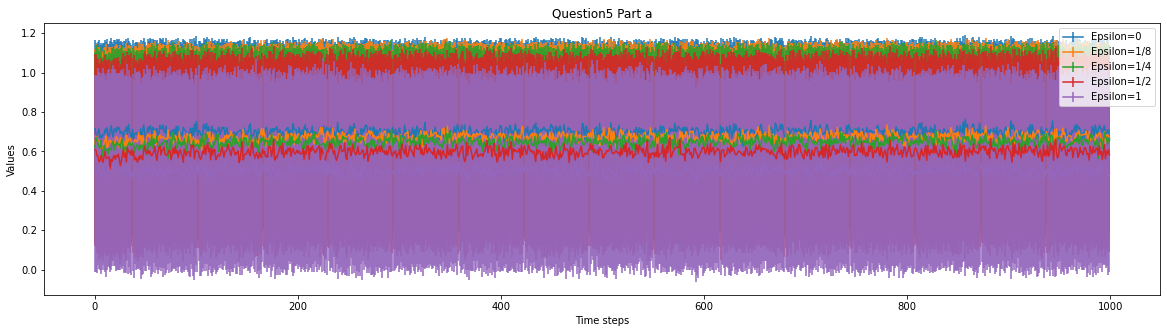

In [272]:
x = np.arange(1000)
plt.errorbar(x, avg_reward[0], yerr=(avg_reward_std[0].reshape(1000,)), label="Epsilon=0")
plt.errorbar(x, avg_reward[1], yerr=(avg_reward_std[1].reshape(1000,)), label="Epsilon=1/8")
plt.errorbar(x, avg_reward[2], yerr=(avg_reward_std[2].reshape(1000,)), label="Epsilon=1/4")
plt.errorbar(x, avg_reward[3], yerr=(avg_reward_std[3].reshape(1000,)), label="Epsilon=1/2")
plt.errorbar(x, avg_reward[4], yerr=(avg_reward_std[4].reshape(1000,)), label="Epsilon=1")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question5 Part a")
plt.legend()
plt.show()

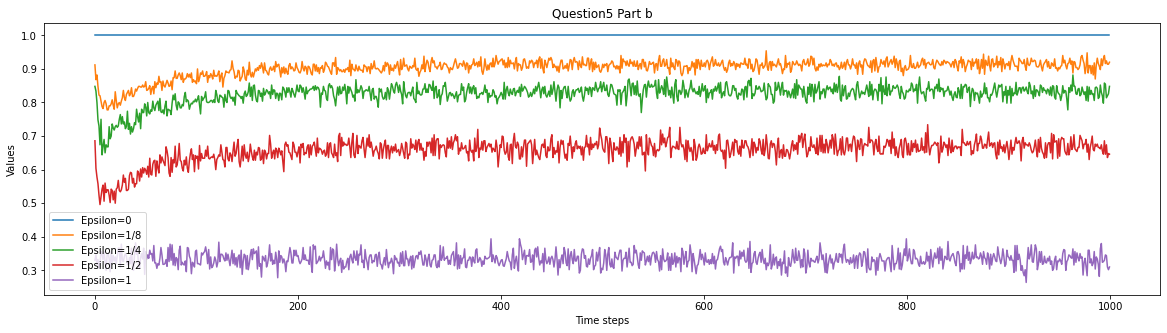

In [273]:
x = np.arange(1000)
plt.plot(x, all_optimal_fraction[0], label="Epsilon=0")
plt.plot(x, all_optimal_fraction[1], label="Epsilon=1/8")
plt.plot(x, all_optimal_fraction[2], label="Epsilon=1/4")
plt.plot(x, all_optimal_fraction[3], label="Epsilon=1/2")
plt.plot(x, all_optimal_fraction[4], label="Epsilon=1")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question5 Part b")
plt.legend()
plt.show()

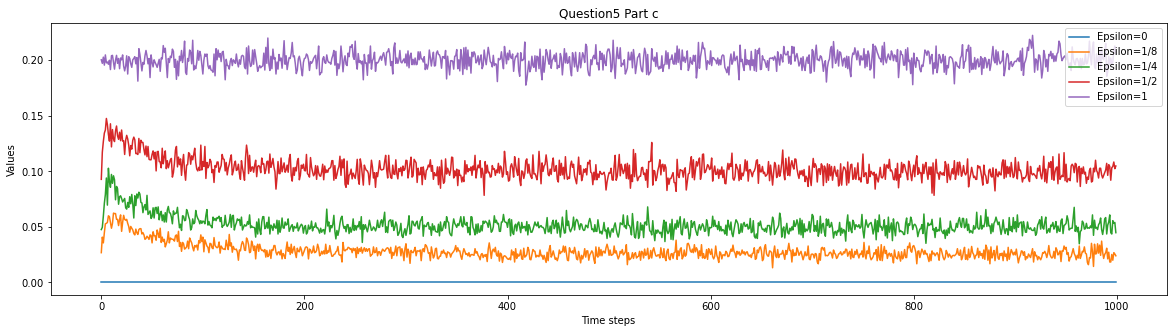

In [274]:
x = np.arange(1000)
plt.plot(x, avg_instant_regret[0], label="Epsilon=0")
plt.plot(x, avg_instant_regret[1], label="Epsilon=1/8")
plt.plot(x, avg_instant_regret[2], label="Epsilon=1/4")
plt.plot(x, avg_instant_regret[3], label="Epsilon=1/2")
plt.plot(x, avg_instant_regret[4], label="Epsilon=1")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question5 Part c")
plt.legend()
plt.show()

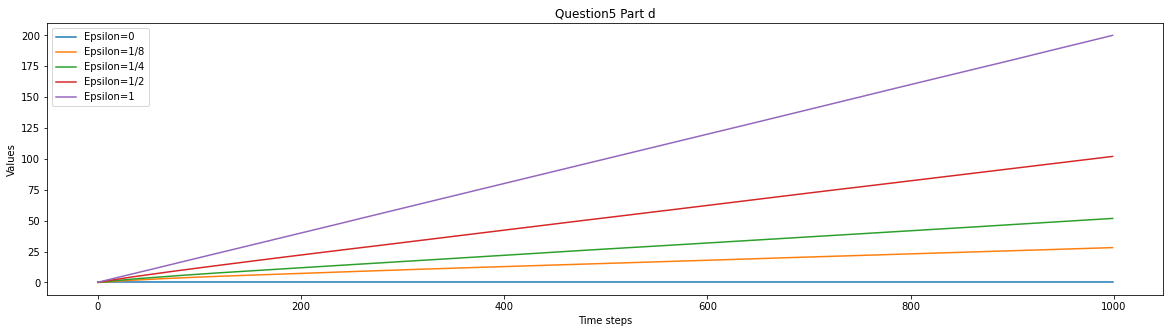

In [275]:
x = np.arange(1000)
plt.plot(x, avg_total_regret[0], label="Epsilon=0")
plt.plot(x, avg_total_regret[1], label="Epsilon=1/8")
plt.plot(x, avg_total_regret[2], label="Epsilon=1/4")
plt.plot(x, avg_total_regret[3], label="Epsilon=1/2")
plt.plot(x, avg_total_regret[4], label="Epsilon=1")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question5 Part d")
plt.legend()
plt.show()

6. Set δ = 0.02 and run the experiment for ε = 1/4 in this case. Compare the result with the one you obtained for the same ε in the previous problem. What do you observe and why?

In [276]:
bandit2 = Bandit([0.7, 0.7 - 0.02, 0.7 - 2 * 0.02])
total_reward = []
fraction_optimal = []
instant_regret = []
for i in range(500):
    rewards, optimal_actions, regrets = epsilon_greedy(1/4, bandit=bandit2)
    total_reward.append(rewards)
    fraction_optimal.append(optimal_actions)
    instant_regret.append(regrets)
avg_reward = np.mean(total_reward, axis=0)
avg_reward_std = np.std(total_reward, axis=0)
all_optimal_fraction = np.mean(fraction_optimal, axis=0)
avg_instant_regret = np.mean(instant_regret, axis=0)
avg_total_regret = np.mean(np.cumsum(instant_regret, axis=1), axis=0)

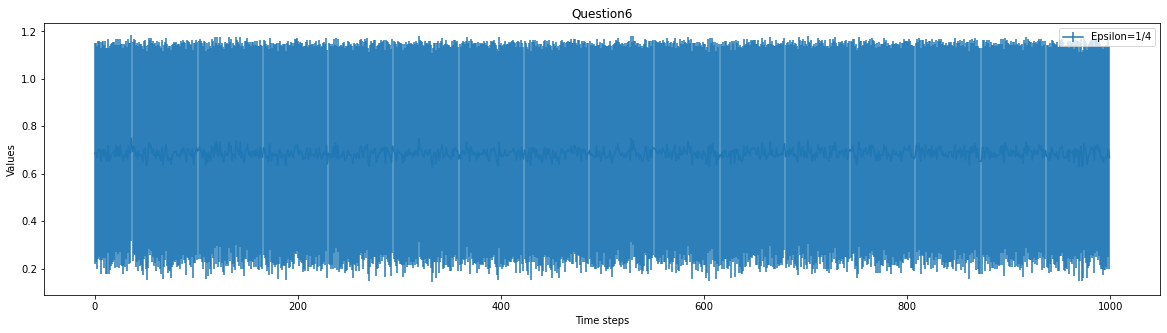

In [277]:
x = np.arange(1000)
plt.errorbar(x, avg_reward, yerr=(avg_reward_std.reshape(1000,)), label="Epsilon=1/4")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question6")
plt.legend()
plt.show()

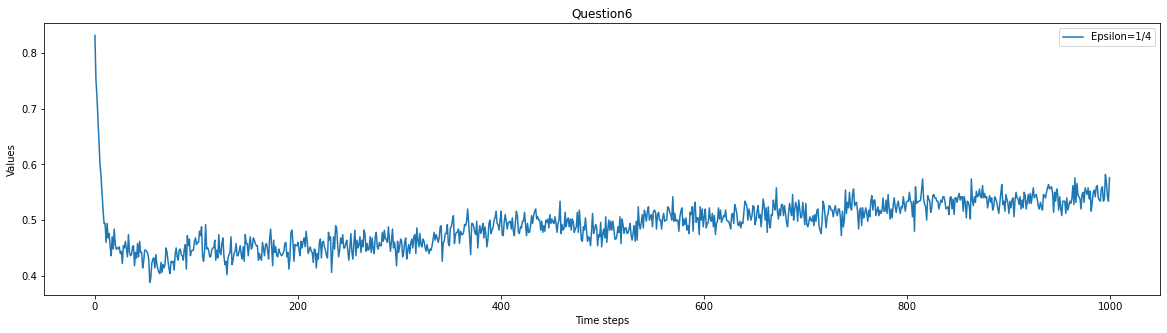

In [278]:
x = np.arange(1000)
plt.plot(x, all_optimal_fraction, label="Epsilon=1/4")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question6")
plt.legend()
plt.show()

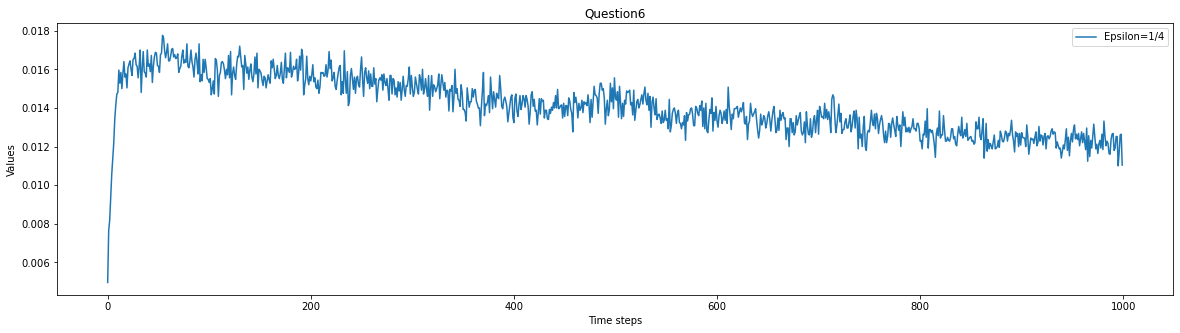

In [279]:
x = np.arange(1000)
plt.plot(x, avg_instant_regret, label="Epsilon=1/4")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question6")
plt.legend()
plt.show()

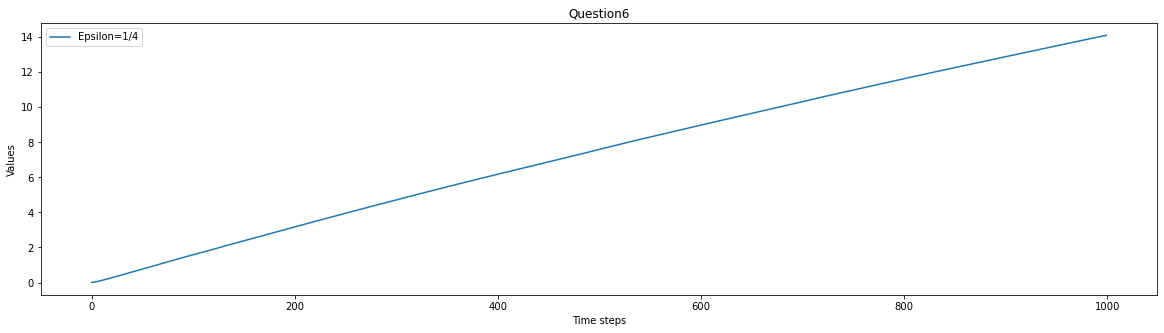

In [280]:
x = np.arange(1000)
plt.plot(x, avg_total_regret, label="Epsilon=1/4")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question6")
plt.legend()
plt.show()

7. Write a function that decays ε, but in a simpler way than discussed in lecture 3. This algorithm will take as input ε and a decay factor λ ∈ (0, 1) and will multiply ε by λ at every step: ε ← ελ. Run the same experiment as above, with δ = 0.2 but with a fixed starting value ε = 1/2 and values of λ = 0.999 and λ = 0.99. Explain what you observe, and compare to the fixed ε case.

In [281]:
def decay_epsilon_greedy(epsilon, decay_factor, bandit=bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        if random.random() <= epsilon:
            action_index = random.randint(0, 2)
        else:
            action_index = Q_as.index(max(Q_as))
        reward = bandit.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += (1 / N_as[action_index]) * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(bandit.actions[bandit.actions.index(max(bandit.actions))] - bandit.actions[action_index])
        
        epsilon *= decay_factor
    return rewards, optimal_actions, regrets

In [282]:
avg_reward = []
avg_reward_std = []
all_optimal_fraction = []
avg_instant_regret = []
avg_total_regret = []

for d in [0.999, 0.99]:
    total_reward = []
    fraction_optimal = []
    instant_regret = []
    for i in range(500):
        rewards, optimal_actions, regrets = decay_epsilon_greedy(epsilon=1/2, decay_factor=d)
        total_reward.append(rewards)
        fraction_optimal.append(optimal_actions)
        instant_regret.append(regrets)
    avg_reward.append(np.mean(total_reward, axis=0))
    avg_reward_std.append(np.std(total_reward, axis=0))
    all_optimal_fraction.append(np.mean(fraction_optimal, axis=0))
    avg_instant_regret.append(np.mean(instant_regret, axis=0))
    avg_total_regret.append(np.mean(np.cumsum(instant_regret, axis=1), axis=0))

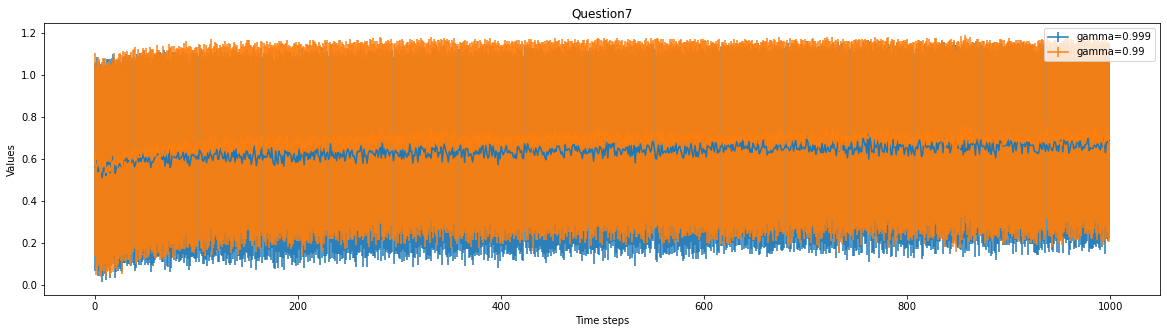

In [283]:
x = np.arange(1000)
plt.errorbar(x, avg_reward[0], yerr=(avg_reward_std[0].reshape(1000,)), label="gamma=0.999")
plt.errorbar(x, avg_reward[1], yerr=(avg_reward_std[1].reshape(1000,)), label="gamma=0.99")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question7")
plt.legend()
plt.show()

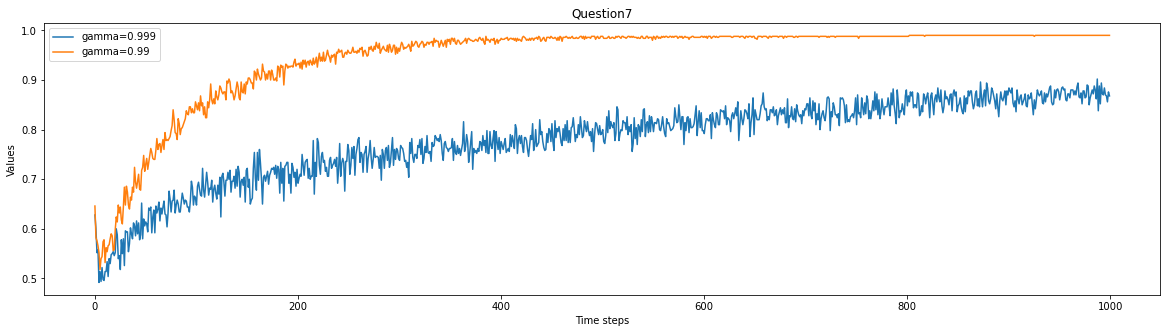

In [284]:
x = np.arange(1000)
plt.plot(x, all_optimal_fraction[0], label="gamma=0.999")
plt.plot(x, all_optimal_fraction[1], label="gamma=0.99")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question7")
plt.legend()
plt.show()

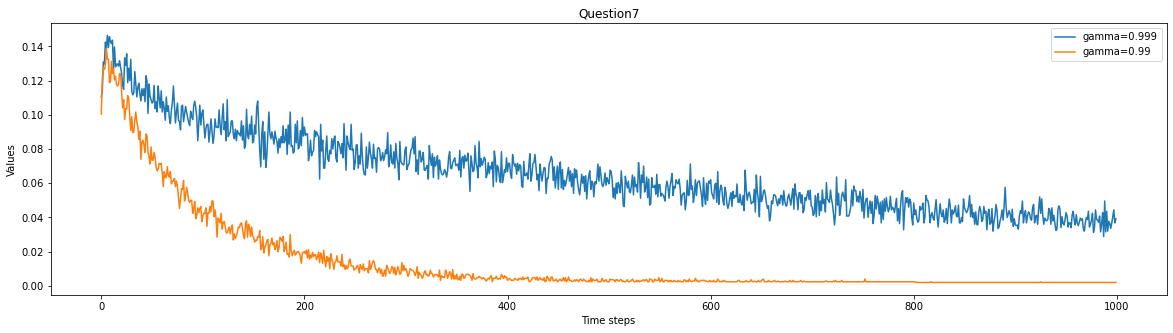

In [285]:
x = np.arange(1000)
plt.plot(x, avg_instant_regret[0], label="gamma=0.999")
plt.plot(x, avg_instant_regret[1], label="gamma=0.99")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question7")
plt.legend()
plt.show()

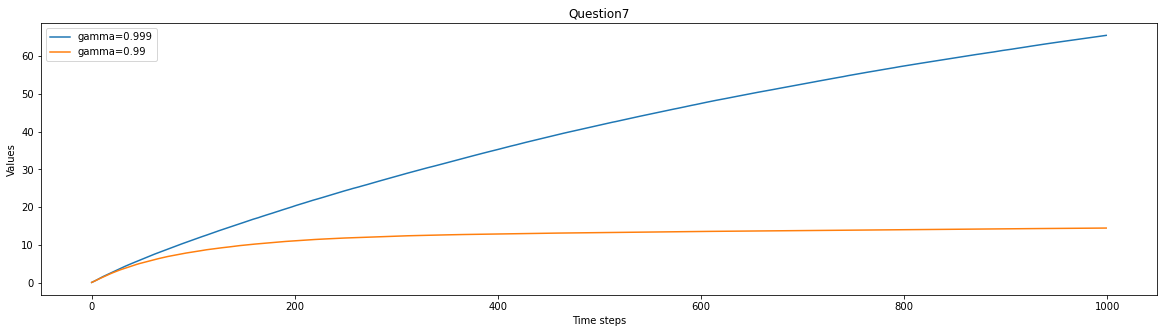

In [286]:
x = np.arange(1000)
plt.plot(x, avg_total_regret[0], label="gamma=0.999")
plt.plot(x, avg_total_regret[1], label="gamma=0.99")
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question7")
plt.legend()
plt.show()

8. Let us now consider a non-stationary problem. Let δ = 0.1 and imagine that after 500 time steps, the parameter of actions 2 and 3 become 0.7 + δ and 0.7 + 2δ respectively. We will compare 4 conditions: fixed α vs averaging and fixed ε vs decaying. Based on your previous experimentations, pick values of α, ε and λ that you want to use, and explain why you picked these. Using these values, run 5 runs and plot the reward graph averaged over these runs. The graph should have 4 lines (with standard error bars). Explain what you see in the graph. Based on these results, which condition is best suited to cope with non-stationarity?

In [287]:
bandit3 = Bandit([0.7, 0.7 - 0.1, 0.7 - 2 * 0.1])

In [288]:
def avg_epsilon_greedy(epsilon, bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    b = bandit
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        if j == 500:
            b = Bandit([0.7, 0.7 + 0.1, 0.7 + 2 * 0.1])
        
        if random.random() <= epsilon:
            action_index = random.randint(0, 2)
        else:
            action_index = Q_as.index(max(Q_as))
        reward = b.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += (1 / N_as[action_index]) * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(b.actions[b.actions.index(max(b.actions))] - b.actions[action_index])
        
    return rewards, optimal_actions, regrets

In [289]:
def alpha_epsilon_greedy(alpha, epsilon, bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    b = bandit
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        if j == 500:
            b = Bandit([0.7, 0.7 + 0.1, 0.7 + 2 * 0.1])
        
        if random.random() <= epsilon:
            action_index = random.randint(0, 2)
        else:
            action_index = Q_as.index(max(Q_as))
        reward = b.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += alpha * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(b.actions[b.actions.index(max(b.actions))] - b.actions[action_index])
        
    return rewards, optimal_actions, regrets

In [290]:
def avg_decay_epsilon_greedy(epsilon, decay_factor, bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    b = bandit
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        if j == 500:
            b = Bandit([0.7, 0.7 + 0.1, 0.7 + 2 * 0.1])
        
        if random.random() <= epsilon:
            action_index = random.randint(0, 2)
        else:
            action_index = Q_as.index(max(Q_as))
        reward = b.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += (1 / N_as[action_index]) * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(b.actions[b.actions.index(max(b.actions))] - b.actions[action_index])
        
        epsilon *= decay_factor
    return rewards, optimal_actions, regrets

In [291]:
def alpha_decay_epsilon_greedy(alpha, epsilon, decay_factor, bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    b = bandit
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        if j == 500:
            b = Bandit([0.7, 0.7 + 0.1, 0.7 + 2 * 0.1])
        
        if random.random() <= epsilon:
            action_index = random.randint(0, 2)
        else:
            action_index = Q_as.index(max(Q_as))
        reward = b.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += alpha * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(b.actions[b.actions.index(max(b.actions))] - b.actions[action_index])
        
        epsilon *= decay_factor
    return rewards, optimal_actions, regrets

In [292]:
avg_reward = []
avg_reward_std = []
total_reward = []
for i in range(500):
    rewards, optimal_actions, regrets = avg_epsilon_greedy(epsilon=1/2, bandit=bandit3)
    total_reward.append(rewards)
avg_reward.append(np.mean(total_reward, axis=0))
avg_reward_std.append(np.std(total_reward, axis=0))
for i in range(500):
    rewards, optimal_actions, regrets = alpha_epsilon_greedy(alpha=0.1, epsilon=1/2, bandit=bandit3)
    total_reward.append(rewards)
avg_reward.append(np.mean(total_reward, axis=0))
avg_reward_std.append(np.std(total_reward, axis=0))
for i in range(500):
    rewards, optimal_actions, regrets = avg_decay_epsilon_greedy(epsilon=1/2, decay_factor=0.99, bandit=bandit3)
    total_reward.append(rewards)
avg_reward.append(np.mean(total_reward, axis=0))
avg_reward_std.append(np.std(total_reward, axis=0))
for i in range(500):
    rewards, optimal_actions, regrets = alpha_decay_epsilon_greedy(alpha=0.1, epsilon=1/2, decay_factor=0.99, bandit=bandit3)
    total_reward.append(rewards)
avg_reward.append(np.mean(total_reward, axis=0))
avg_reward_std.append(np.std(total_reward, axis=0))

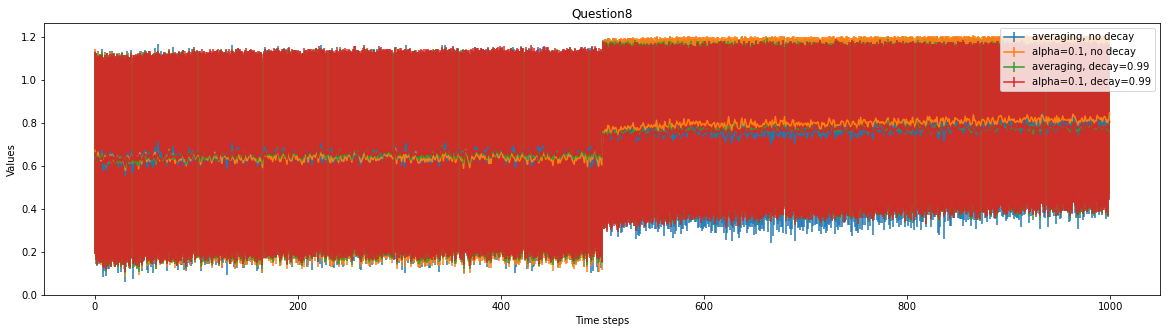

In [293]:
x = np.arange(1000)
# '''
plt.errorbar(x, avg_reward[0], yerr=(avg_reward_std[0].reshape(1000,)), label="averaging, no decay")
plt.errorbar(x, avg_reward[1], yerr=(avg_reward_std[1].reshape(1000,)), label="alpha=0.1, no decay")
plt.errorbar(x, avg_reward[2], yerr=(avg_reward_std[1].reshape(1000,)), label="averaging, decay=0.99")
plt.errorbar(x, avg_reward[3], yerr=(avg_reward_std[1].reshape(1000,)), label="alpha=0.1, decay=0.99")
# '''

'''
plt.errorbar(x, avg_reward[0], label="averaging, no decay")
plt.errorbar(x, avg_reward[1], label="alpha=0.1, no decay")
plt.errorbar(x, avg_reward[2], label="averaging, decay=0.99")
plt.errorbar(x, avg_reward[3], label="alpha=0.1, decay=0.99")
'''

plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question8")
plt.legend()
plt.show()

9. Write a function that uses softmax(aka Boltzmann)exploration,as discussed in lecture 4. This function will use averaging for the value estimation, and fixed values of the temperature of 1000, 10, 1 and 0.1. Run the same experiment as above with δ = 0.2 and explain what you see. Discuss the similarities and differences of softmax and ε-greedy based on these results.

In [294]:
from math import exp
def softmax_exploration_stationary(temperature, bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    b = bandit
    action_probability = []
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        p = random.random()
        
        denominator = exp(Q_as[0]/temperature) + exp(Q_as[1]/temperature) + exp(Q_as[2]/temperature)
        p_1 = (exp(Q_as[0]/temperature)) / (denominator)
        p_2 = (exp(Q_as[1]/temperature)) / (denominator)
        p_3 = (exp(Q_as[2]/temperature)) / (denominator)
        if p < p_1:
            action_index = 0
        elif p < p_2:
            action_index = 1
        else:
            action_index = 2
        
        reward = b.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += (1 / N_as[action_index]) * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(b.actions[b.actions.index(max(b.actions))] - b.actions[action_index])
        
    return rewards, optimal_actions, regrets

In [295]:
def softmax_exploration_non_stationary(temperature, bandit):
    rewards = []
    optimal_actions = []
    regrets = []
    b = bandit
    
    Q_as = [0, 0, 0]
    N_as = [0, 0, 0]
    for j in range(1000):
        if j == 500:
            b = Bandit([0.7, 0.7 + 0.1, 0.7 + 2 * 0.1])
        
        p = random.random()
        
        denominator = exp(Q_as[0]/temperature) + exp(Q_as[1]/temperature) + exp(Q_as[2]/temperature)
        p_1 = (exp(Q_as[0]/temperature)) / (denominator)
        p_2 = (exp(Q_as[1]/temperature)) / (denominator)
        p_3 = (exp(Q_as[2]/temperature)) / (denominator)
        if p < p_1:
            action_index = 0
        elif p < p_1 + p_2:
            action_index = 1
        elif p < p_1 + p_2 + p_3:
            action_index = 2        
            
        reward = b.sample(action_index)
        N_as[action_index] += 1
        Q_as[action_index] += (1 / N_as[action_index]) * (reward - Q_as[action_index])
        
        rewards.append(reward)
        if action_index == 0:
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        regrets.append(b.actions[b.actions.index(max(b.actions))] - b.actions[action_index])
        
    return rewards, optimal_actions, regrets

In [296]:
# Stationary
avg_reward = []
avg_reward_std = []
bandit4 = Bandit([0.7, 0.7 - 0.2, 0.7 - 2 * 0.2])

for t in [1000, 10, 1, 0.1]:
    total_reward = []
    for i in range(500):
        rewards, optimal_actions, regrets = softmax_exploration_stationary(temperature=t, bandit=bandit4)
        total_reward.append(rewards)
    avg_reward.append(np.mean(total_reward, axis=0))
    avg_reward_std.append(np.std(total_reward, axis=0))
    all_optimal_fraction.append(np.mean(fraction_optimal, axis=0))
    avg_instant_regret.append(np.mean(instant_regret, axis=0))
    avg_total_regret.append(np.mean(np.cumsum(instant_regret, axis=1), axis=0))

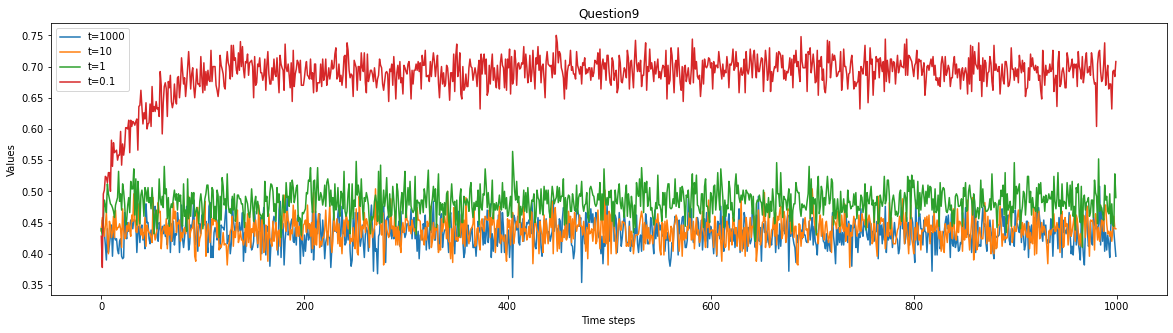

In [297]:
x = np.arange(1000)
'''
plt.errorbar(x, avg_reward[0], yerr=(avg_reward_std[0].reshape(1000,)), label="averaging, no decay")
plt.errorbar(x, avg_reward[1], yerr=(avg_reward_std[1].reshape(1000,)), label="alpha=0.1, no decay")
plt.errorbar(x, avg_reward[2], yerr=(avg_reward_std[1].reshape(1000,)), label="averaging, decay=0.99")
plt.errorbar(x, avg_reward[3], yerr=(avg_reward_std[1].reshape(1000,)), label="alpha=0.1, decay=0.99")
'''

#'''
plt.errorbar(x, avg_reward[0], label="t=1000")
plt.errorbar(x, avg_reward[1], label="t=10")
plt.errorbar(x, avg_reward[2], label="t=1")
plt.errorbar(x, avg_reward[3], label="t=0.1")
#'''

plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question9")
plt.legend()
plt.show()

In [299]:
# Non - Stationary
avg_reward = []
avg_reward_std = []
bandit5 = Bandit([0.7, 0.7 - 0.1, 0.7 - 2 * 0.1])

for t in [1000, 10, 1, 0.1]:
    total_reward = []
    for i in range(500):
        rewards, optimal_actions, regrets = softmax_exploration_non_stationary(temperature=t, bandit=bandit5)
        total_reward.append(rewards)
    avg_reward.append(np.mean(total_reward, axis=0))
    avg_reward_std.append(np.std(total_reward, axis=0))
    all_optimal_fraction.append(np.mean(fraction_optimal, axis=0))
    avg_instant_regret.append(np.mean(instant_regret, axis=0))
    avg_total_regret.append(np.mean(np.cumsum(instant_regret, axis=1), axis=0))

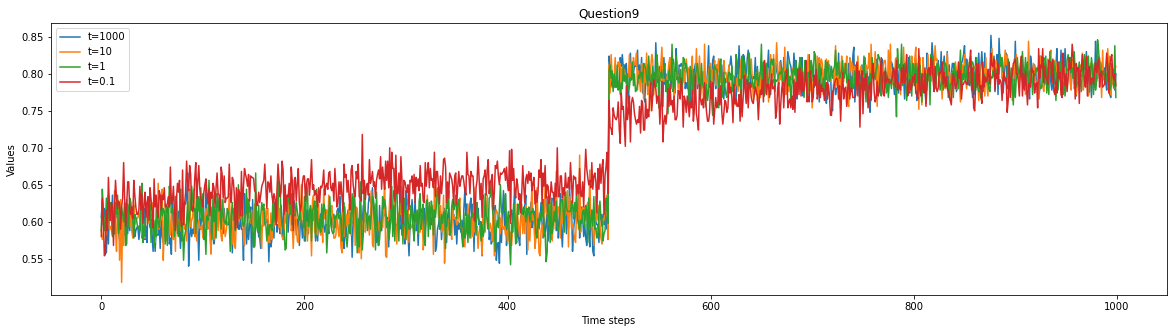

In [300]:
x = np.arange(1000)
'''
plt.errorbar(x, avg_reward[0], yerr=(avg_reward_std[0].reshape(1000,)), label="averaging, no decay")
plt.errorbar(x, avg_reward[1], yerr=(avg_reward_std[1].reshape(1000,)), label="alpha=0.1, no decay")
plt.errorbar(x, avg_reward[2], yerr=(avg_reward_std[1].reshape(1000,)), label="averaging, decay=0.99")
plt.errorbar(x, avg_reward[3], yerr=(avg_reward_std[1].reshape(1000,)), label="alpha=0.1, decay=0.99")
'''

#'''
plt.errorbar(x, avg_reward[0], label="t=1000")
plt.errorbar(x, avg_reward[1], label="t=10")
plt.errorbar(x, avg_reward[2], label="t=1")
plt.errorbar(x, avg_reward[3], label="t=0.1")
#'''

plt.xlabel('Time steps')
plt.ylabel('Values')
plt.title("Question9")
plt.legend()
plt.show()